In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from src import *
from model.classification import *
from train_classification import *

from tqdm.notebook import tqdm
from IPython.display import HTML
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

import torch.nn as nn
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

In [3]:
model, config = load_model_locally(f'one_location', model_name='rvce')

In [4]:
files = ['12_RX100']
datapool = DataPool(files, config.window_length, config.split_ratio, tqdm=tqdm)

Video loading:   0%|          | 0/1 [00:00<?, ?it/s]

In [5]:
video = datapool[next(iter(datapool.keys()))]

sr = config.sr
audio = video.signal
events = video.events

samples, labels = create_dataset_sequentially(audio, sr, events, window_length=config.window_length)

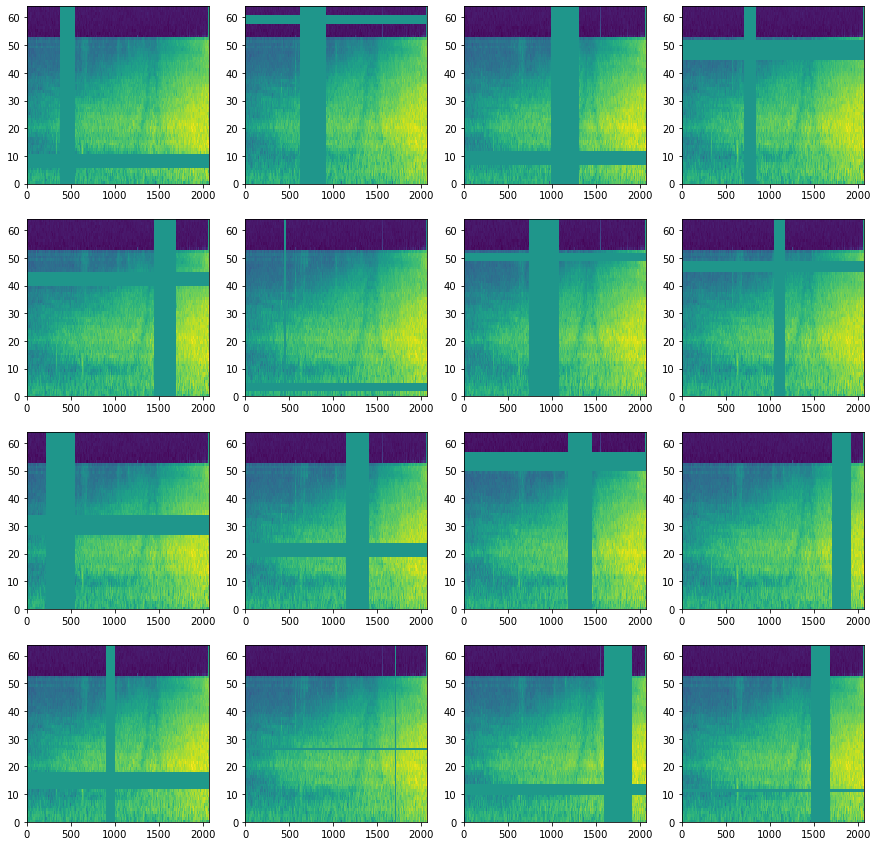

In [5]:
sample = samples[0]

config.feature_augmentation = True
config.time_mask_param = 344
config.freq_mask_param = 8
transform = create_transformation(config, True)

nrows = ncols = 4
fig, axes = plt.subplots(nrows, ncols, figsize=(15, 15))

for i in range(nrows):
    for j in range(ncols):
        features = transform(sample).squeeze()
        axes[i, j].pcolormesh(features)

In [6]:
import torchvision.transforms as T
import albumentations as A
import torch

In [75]:
# self.transform(image=sample)['image']

tf = A.Compose([
    A.OneOf([
        A.MotionBlur(5),
        A.MedianBlur(5),
        A.Blur(5),
    ]),
])


tf = T.RandomChoice([
    lambda x: x,
    T.GaussianBlur(3),
    T.GaussianBlur(5),
    T.GaussianBlur(7)
])

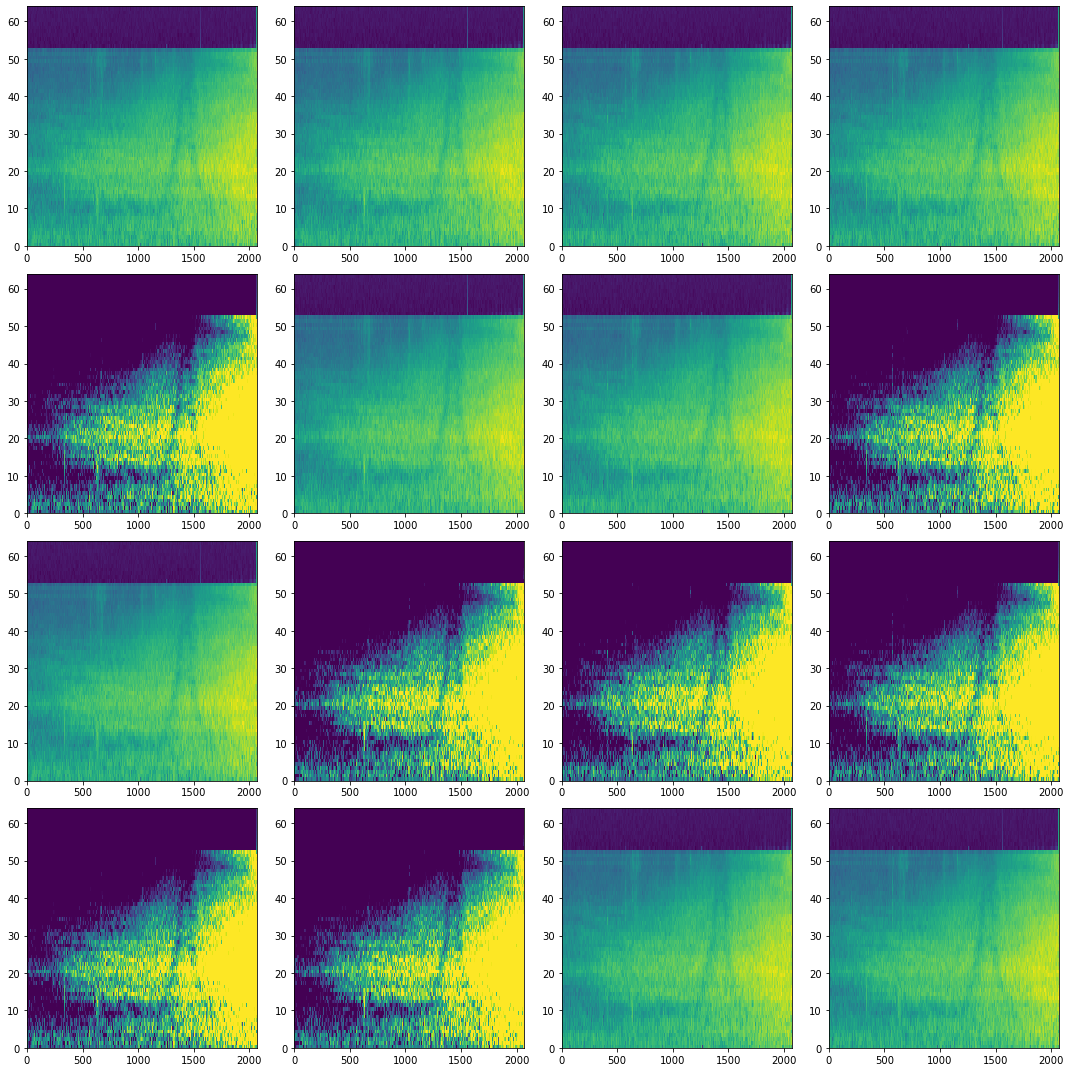

In [76]:
sample = samples[0]

config.feature_augmentation = False
transform = create_transformation(config, True)

nrows = ncols = 4
fig, axes = plt.subplots(nrows, ncols, figsize=(15, 15))

# tf = T.TrivialAugmentWide()
# tf = T.ColorJitter((,1))

features_initial = transform(sample).squeeze()

for i in range(nrows):
    for j in range(ncols):
        # features = transform(sample).squeeze().numpy()
        features = transform(sample)
        features = tf(features).squeeze()
        # features = tf(image=features)['image'].squeeze()
        # print((features_initial - features).abs().mean())
        axes[i, j].pcolormesh(features)

axes[0, 0].pcolormesh(features_initial)
plt.tight_layout()